In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
training_data = pd.read_csv('./training_data.csv')
training_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
383,655,27,3,Bad Boys (1995),0,50,0,1
636,13,901,1,Mr. Magoo (1997),4,47,1,0
252,405,573,3,Body Snatchers (1993),14,22,0,1
640,13,418,2,Cinderella (1950),2,47,1,0
186,405,574,1,Boxing Helena (1993),12,22,0,1
396,655,252,2,"Lost World: Jurassic Park, The (1997)",15,50,0,1
377,655,476,2,"First Wives Club, The (1996)",4,50,0,1
271,405,1571,1,Touki Bouki (Journey of the Hyena) (1973),7,22,0,1
430,655,1085,2,Carried Away (1996),13,50,0,1
403,655,1418,4,"Joy Luck Club, The (1993)",7,50,0,1


In [157]:
test_data = pd.read_csv('./test_data.csv')
test_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
122,405,668,1,Blood Beach (1981),10,22,0,1
410,13,787,3,Roommates (1995),7,47,1,0
395,655,785,2,Only You (1994),13,50,0,1
401,655,469,3,Short Cuts (1993),7,50,0,1
402,13,783,3,Milk Money (1994),4,47,1,0
295,655,250,3,"Fifth Element, The (1997)",14,50,0,1
406,13,821,3,Mrs. Winterbourne (1996),13,47,1,0
231,655,1147,3,My Family (1995),7,50,0,1
515,13,654,5,Chinatown (1974),15,47,1,0
362,655,900,3,Kundun (1997),7,50,0,1


In [158]:
valid_data = pd.read_csv('./valid_data.csv')
valid_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
380,655,1554,2,Safe Passage (1994),7,50,0,1
408,13,410,1,Kingpin (1996),4,47,1,0
58,405,584,1,"Secret Garden, The (1993)",3,22,0,1
186,405,434,3,Forbidden Planet (1956),14,22,0,1
535,13,132,4,"Wizard of Oz, The (1939)",7,47,1,0
195,405,231,3,Batman Returns (1992),0,22,0,1
431,13,164,3,"Abyss, The (1989)",14,47,1,0
560,13,899,1,"Winter Guest, The (1997)",7,47,1,0
14,405,1032,1,Little Big League (1994),3,22,0,1
582,13,793,5,Crooklyn (1994),4,47,1,0


In [159]:
with open('./recommendations.pkl', 'rb') as f:
    recommendations = pickle.load(f)
    
recommendations

defaultdict(list,
            {655: [(-5, 423),
              (np.float64(-4.513134781147648), 56),
              (np.float64(-4.513134781147648), 467),
              (np.float64(-4.513134781147648), 624),
              (np.float64(-4.486865218852351), 186),
              (np.float64(-3.973730437704704), 452),
              (np.float64(-3.539404343442944), 519),
              (np.float64(-3.973730437704704), 73),
              (np.float64(-3.973730437704704), 673),
              (np.float64(-3.513134781147648), 72),
              (np.float64(-1.0), 217),
              (np.float64(-3.026269562295296), 226),
              (np.float64(-3.513134781147648), 88),
              (np.float64(-3.486865218852352), 90),
              (np.float64(-2.0262695622952966), 308),
              (np.float64(-3.052539124590593), 570),
              (np.float64(-3.973730437704704), 318),
              (np.float64(-3.513134781147648), 178),
              (np.float64(-2.5394043434429445), 720),
              (

In [160]:
recommendations_dict = {
    'user_id': [],
    'movie_id' : [],
    'imputed_rating': [],
}
for user_id, recommendation_list in recommendations.items():
    recommendations_dict['user_id'] += ([user_id] * len(recommendation_list))
    recommendations_dict['movie_id'] += ([recommendation[1] for recommendation in recommendation_list])
    recommendations_dict['imputed_rating'] += ([-recommendation[0] for recommendation in recommendation_list])


recommendations_df = pd.DataFrame(recommendations_dict)
recommendations_df.sample(10)

,user_id,movie_id,imputed_rating
120,13,707,2.023928
0,655,423,5.000000
107,13,393,2.976072
14,655,308,2.026270
52,405,685,3.503514
118,13,92,2.023928
132,13,1108,2.023928
105,13,87,2.023928
133,13,1167,2.023928
91,13,50,4.488036


In [161]:
recommendations_df.shape

(137, 3)

In [162]:
test_merged_df = recommendations_df.merge(right=test_data, how='inner', on=['user_id', 'movie_id'])
print(test_merged_df.shape)
test_merged_df

(24, 9)


,user_id,movie_id,imputed_rating,rating,title,genre,age,gender,occupation
0,655,423,5.000000,3,E.T. the Extra-Terrestrial (1982),3,50,0,1
1,655,467,4.513135,3,"Bronx Tale, A (1993)",7,50,0,1
2,655,186,4.486865,3,"Blues Brothers, The (1980)",4,50,0,1
3,655,178,3.513135,4,12 Angry Men (1957),7,50,0,1
4,655,212,3.052539,3,"Unbearable Lightness of Being, The (1988)",7,50,0,1
5,655,2,2.026270,3,GoldenEye (1995),15,50,0,1
6,655,514,3.052539,5,Annie Hall (1977),13,50,0,1
7,655,396,2.026270,2,Serial Mom (1994),5,50,0,1
8,405,161,3.503514,1,Top Gun (1986),0,22,0,1
9,405,198,3.498829,2,Nikita (La Femme Nikita) (1990),15,22,0,1


In [163]:
valid_merged_df = recommendations_df.merge(right=valid_data, how='inner', on=['user_id', 'movie_id'])
print(valid_merged_df.shape)
valid_merged_df

(32, 9)


,user_id,movie_id,imputed_rating,rating,title,genre,age,gender,occupation
0,655,56,4.513135,3,Pulp Fiction (1994),5,50,0,1
1,655,673,3.973730,3,Cape Fear (1962),15,50,0,1
2,655,226,3.026270,3,Die Hard 2 (1990),15,50,0,1
3,655,88,3.513135,2,Sleepless in Seattle (1993),13,50,0,1
4,655,318,3.973730,4,Schindler's List (1993),7,50,0,1
5,655,451,2.947461,3,Grease (1978),4,50,0,1
6,405,48,4.501171,1,Hoop Dreams (1994),6,22,0,1
7,405,64,4.501171,5,"Shawshank Redemption, The (1994)",7,22,0,1
8,405,208,4.002343,5,Young Frankenstein (1974),10,22,0,1
9,405,215,3.503514,5,Field of Dreams (1989),7,22,0,1


In [164]:
test_merged_df['rating_diff'] = abs(test_merged_df['rating'] - test_merged_df['imputed_rating'])
test_merged_df['rating_diff'].mean()

np.float64(1.4350563009631)

In [165]:
valid_merged_df['rating_diff'] = abs(valid_merged_df['rating'] - valid_merged_df['imputed_rating'])
valid_merged_df['rating_diff'].mean()

np.float64(1.5323636221844885)

In [166]:
for user_id in recommendations.keys():
    print(f'User {user_id}\'s MAE on test dataset:', test_merged_df.loc[test_merged_df['user_id'] == user_id]['rating_diff'].mean())
    print(f'User {user_id}\'s MAE on valid dataset:', valid_merged_df.loc[valid_merged_df['user_id'] == user_id]['rating_diff'].mean())
    print()

User 655's MAE on test dataset: 1.060858152356544
User 655's MAE on valid dataset: 0.6841797081968641

User 405's MAE on test dataset: 2.200468538268254
User 405's MAE on valid dataset: 1.8002342691341269

User 13's MAE on test dataset: 1.359285755720071
User 13's MAE on valid dataset: 1.6830134355863233



In [167]:
mape = (test_merged_df['rating_diff'] / test_merged_df['rating']).mean() * 100
accuracy_mape = 100 - mape 
accuracy_mape

np.float64(30.953689508010086)

In [168]:
mape = (valid_merged_df['rating_diff'] / valid_merged_df['rating']).mean() * 100
accuracy_mape = 100 - mape 
accuracy_mape

np.float64(21.655892498473833)

In [172]:
def precision_at_k(actual, predicted, k=5):
    num_rel_items_in_k = len(set(predicted[: k]).intersection(set(actual)))
    return num_rel_items_in_k / k

def recall_at_k(actual, predicted, k=5):
    total_num_rel_items = len(actual)
    num_rel_items_in_k = len(set(predicted[: k]).intersection(set(actual)))
    return num_rel_items_in_k / total_num_rel_items

def f1(actual, predicted, k=5):
    p = precision_at_k(actual, predicted, k=k)
    r = recall_at_k(actual, predicted, k=k)
    denom = 0

    if p == 0 and r == 0:
        denom = 0
    elif p == 0:
        denom = (1 / r)
    elif r == 0:
        denom = (1 / p)
    else:
        denom = ((1 / p) + (1 / r))

    if denom == 0:
        return 0
    
    return 2 / denom

In [173]:
test_actual = []
valid_actual = []

ordered_recommendations = []

for user_id in sorted(list(recommendations.keys())):
    print(user_id)
    test_actual.append(list(test_data.loc[test_data['user_id'] == user_id]['movie_id'].values))
    valid_actual.append(list(valid_data.loc[valid_data['user_id'] == user_id]['movie_id'].values))

    ordered_recommendations.append([np.int64(t[1]) for t in recommendations[user_id]])

13
405
655


In [174]:
ks = [int(k) for k in np.arange(5, 101, 5)]

user_a_precision = []
user_a_recall = []
user_a_f1 = []

user_b_precision = []
user_b_recall = []
user_b_f1 = []

user_c_precision = []
user_c_recall = []
user_c_f1 = []

for k in ks:
    user_a_precision.append(precision_at_k(test_actual[0], ordered_recommendations[0], k=k))
    user_a_recall.append(recall_at_k(test_actual[0], ordered_recommendations[0], k=k))
    user_a_f1.append(f1(test_actual[0], ordered_recommendations[0], k=k))
    
    user_b_precision.append(precision_at_k(test_actual[1], ordered_recommendations[1], k=k))
    user_b_recall.append(recall_at_k(test_actual[1], ordered_recommendations[1], k=k))
    user_b_f1.append(f1(test_actual[1], ordered_recommendations[1], k=k))

    user_c_precision.append(precision_at_k(test_actual[2], ordered_recommendations[2], k=k))
    user_c_recall.append(recall_at_k(test_actual[2], ordered_recommendations[2], k=k))
    user_c_f1.append(f1(test_actual[2], ordered_recommendations[2], k=k))


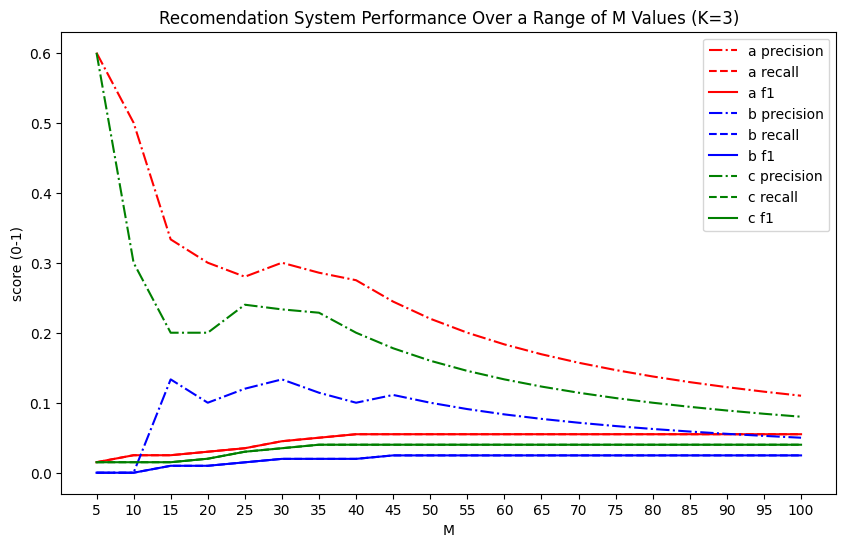

In [178]:
plt.figure(figsize=(10, 6))

plt.plot(ks, user_a_precision, label="a precision", color="red", linestyle="-.")
plt.plot(ks, user_a_recall, label="a recall", color="red", linestyle="--")
plt.plot(ks, user_a_recall, label="a f1", color="red", linestyle="-")

plt.plot(ks, user_b_precision, label="b precision", color="blue", linestyle="-.")
plt.plot(ks, user_b_recall, label="b recall", color="blue", linestyle="--")
plt.plot(ks, user_b_recall, label="b f1", color="blue", linestyle="-")

plt.plot(ks, user_c_precision, label="c precision", color="green", linestyle="-.")
plt.plot(ks, user_c_recall, label="c recall", color="green", linestyle="--")
plt.plot(ks, user_c_recall, label="c f1", color="green", linestyle="-")


plt.xticks(ks)

plt.legend()

plt.title('Recomendation System Performance Over a Range of M Values (K=3)')
plt.xlabel('M')
plt.ylabel('score (0-1)')

plt.show()